In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from dataclasses import dataclass

sns.set_style('darkgrid')  # Options: darkgrid, whitegrid, dark, white, ticks
sns.set_context('talk')  # Options: paper, notebook, talk, poster

In [2]:
@dataclass
class EpochData:
    """Class for keeping track of data associated with an epoch."""
    epoch: int
    loss: float
    train_accuracy: float
    test_accuracy: float


def get_data(filename):
    lines = open(filename).read().strip().split('\n')
    datalines = [l for l in lines if not l.startswith('#')]
    data = []
    for l in datalines:
        tokens = l.split(' | ')
        epoch = int(tokens[0].split(':')[1].strip())
        loss = float(tokens[1].split(':')[1].strip())
        train_accuracy = float(tokens[2].split(':')[1].strip())
        test_accuracy = float(tokens[3].split(':')[1].strip())
        epoch_data = EpochData(epoch, loss, train_accuracy, test_accuracy)
        data.append(epoch_data)
    return data

In [3]:
files = {
    'mf_50_512_0.001_8_0.0_False': 'mf/mf_50_512_0.001_8_0.0_False.txt',
    'mf_50_512_0.001_16_0.0_False': 'mf/mf_50_512_0.001_16_0.0_False.txt',
    'mf_50_512_0.001_32_0.0_False': 'mf/mf_50_512_0.001_32_0.0_False.txt',
    'mf_50_512_0.001_64_0.0_False': 'mf/mf_50_512_0.001_64_0.0_False.txt',
    'mf_50_512_0.001_128_0.0_False': 'mf/mf_50_512_0.001_128_0.0_False.txt',
    'mf_50_512_0.001_256_0.0_False': 'mf/mf_50_512_0.001_256_0.0_False.txt',
    
    'mf_50_256_0.001_128_0.0_False': 'mf/mf_50_256_0.001_128_0.0_False.txt',
    'mf_50_1024_0.001_128_0.0_False': 'mf/mf_50_1024_0.001_128_0.0_False.txt',
    
    'mf_50_512_0.01_128_0.0_False': 'mf/mf_50_512_0.01_128_0.0_False.txt',
    'mf_50_512_0.0001_128_0.0_False': 'mf/mf_50_512_0.0001_128_0.0_False.txt',
    
    'mf_50_512_0.001_128_1e-7_False': 'mf/mf_50_512_0.001_128_1e-7_False.txt',
    'mf_50_512_0.001_128_1e-6_False': 'mf/mf_50_512_0.001_128_1e-6_False.txt',
    'mf_50_512_0.001_128_1e-5_False': 'mf/mf_50_512_0.001_128_1e-5_False.txt',
    'mf_50_512_0.001_128_0.0001_False': 'mf/mf_50_512_0.001_128_0.0001_False.txt',
}

In [4]:
def plot_multiple_epochs(labels, file_keys, epoch_offset, plot_label):
    data = {}
    
    # Use the first log file to get epochs
    parsed_data = get_data(files[file_keys[0]])
    data['Epochs'] = [d.epoch for d in parsed_data][epoch_offset:]
    
    for label, file_key in zip(labels, file_keys):
        parsed_data = get_data(files[file_key])
        test_accuracy = [d.test_accuracy for d in parsed_data][epoch_offset:]
        data[label] = test_accuracy
    
    width = 12
    length = 7
    fig, axs = plt.subplots(1, 1, figsize=(width, length))
    df = pd.DataFrame(data)
    df = pd.melt(df, ['Epochs'])
    df = df.rename(columns={'value': 'Test Accuracy', 'variable': plot_label})
    sns.lineplot(x='Epochs', y='Test Accuracy', hue=plot_label, data=df)

## Matrix Factorization - Embedding Size

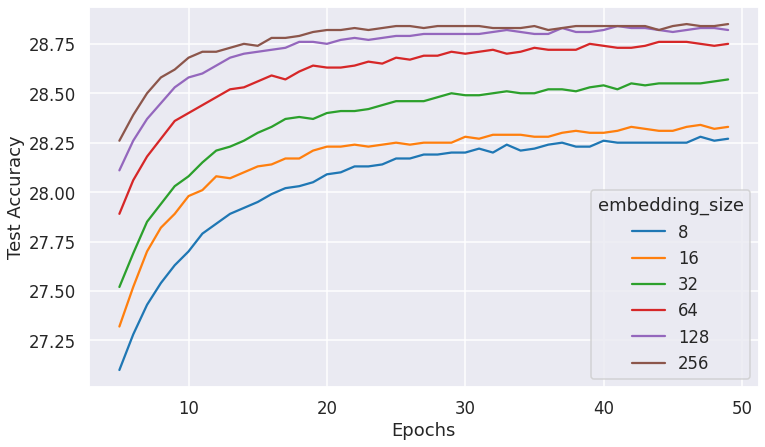

In [5]:
labels = ['8', '16', '32', '64', '128', '256']
file_keys = [
    'mf_50_512_0.001_8_0.0_False',
    'mf_50_512_0.001_16_0.0_False',
    'mf_50_512_0.001_32_0.0_False',
    'mf_50_512_0.001_64_0.0_False',
    'mf_50_512_0.001_128_0.0_False',
    'mf_50_512_0.001_256_0.0_False',
]
plot_multiple_epochs(labels, file_keys, 5, 'embedding_size')

## Matrix Factorization - Batch Size

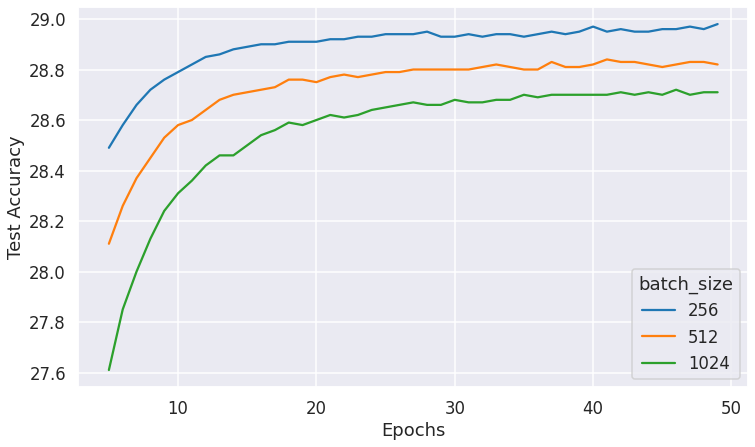

In [6]:
labels = ['256', '512', '1024']
file_keys = [
    'mf_50_256_0.001_128_0.0_False',
    'mf_50_512_0.001_128_0.0_False',
    'mf_50_1024_0.001_128_0.0_False',
]
plot_multiple_epochs(labels, file_keys, 5, 'batch_size')

## Matrix Multiplication - Learning Rate

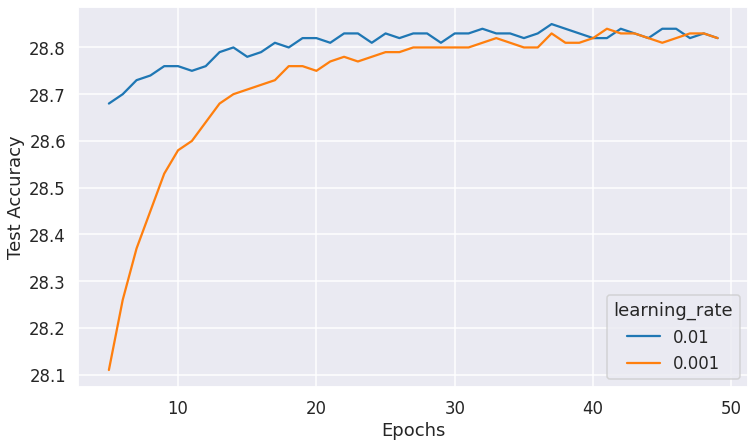

In [7]:
labels = ['0.01', '0.001']
file_keys = [
    'mf_50_512_0.01_128_0.0_False',
    'mf_50_512_0.001_128_0.0_False',
#     'mf_50_1024_0.0001_128_0.0_False',
]
plot_multiple_epochs(labels, file_keys, 5, 'learning_rate')

## Matrix Multiplication - L2 Regularization

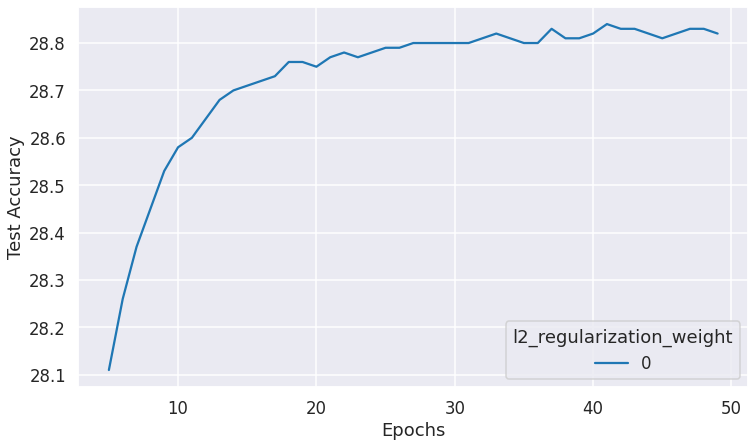

In [8]:
labels = ['0', '1e-7', '1e-6', '1e-5', '1e-4']
labels = ['0']
file_keys = [
    'mf_50_512_0.001_128_0.0_False',
#     'mf_50_512_0.001_128_1e-7_False',
#     'mf_50_512_0.001_128_1e-6_False',
#     'mf_50_512_0.001_128_1e-5_False',
#     'mf_50_512_0.001_128_0.0001_False',
]
plot_multiple_epochs(labels, file_keys, 5, 'l2_regularization_weight')